# nema4  (20 mm LXe) 

- PRODUCED BY NEW SCHEMA, 5 10^6 events
- Phantom : nema 4
- Events: all
- Detector geometry: SiPMs in LXe, with Hamamatsu sipms
- Time resolution: 50 ps
- qcut > 2 pes
- ntof = 7
- PDE = 0.3
- LXe: 20 mm

In [1]:
using Pkg
Pkg.activate(normpath(joinpath(@__DIR__, "..")))  #activate environment in ,,/src

In [2]:
using Plots
using DataFrames
using HDF5
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [3]:
using Glob
using CSV

In [4]:
using Statistics
using StatsBase
using Printf

In [5]:
using Logging

In [6]:
using ATools

In [7]:
include("../src/ANema.jl") 

Main.ANema

In [8]:
println(names(ATools))

[:ATools, :centers, :dxyz, :edges, :find_max_xy, :fit, :fit_gauss, :fit_gauss_fm, :fit_pol1, :fit_pol2, :fit_pol3, :fit_profile, :fitg1, :fitg2, :fphi, :gline2p, :hist1d, :hist2d, :in_range, :mean_std, :p1df, :phixy, :plot_fit_gauss, :rxy, :select_by_column_value, :select_by_column_value_closed_interval, :select_by_column_value_closed_left_interval, :select_by_column_value_closed_right_interval, :select_by_column_value_ge, :select_by_column_value_gt, :select_by_column_value_interval, :select_by_column_value_le, :select_by_column_value_lt, :select_by_index, :select_event, :wstd]


In [9]:
println(names(ANema))

[:ANema, :cdoi, :crt, :ctsr, :deltatime, :dftolor, :distance_lor_to_point, :radial_correcction, :readdf, :selectinterval, :setunits, :sinogramdf, :thetasgrm, :write_lors_hdf5, :writemdf, :zsgrm, :ztsinogram]


In [10]:
import Unitful:
    nm, μm, mm, cm, ns, μs, ms, ps, s

In [11]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

## NB functions
- These are specific for plotting and are better kept in the NB

In [12]:
loglevel("Warn")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(44) open, 0 bytes waiting))), Info, Dict{Any, Int64}())

# Notebook

In [13]:
norm = 5.0e+6
dir = "../data/"
dirp = "../plots"
conf = "n4-w-20mm-qc2"
out = string(conf, "-mdf")
path = joinpath(dir, conf)
pathp = joinpath(dirp, conf)
patho = joinpath(dir, out)

if isdir(pathp) == false
    mkdir(pathp)
end

if isdir(patho) == false
    mkdir(patho)
end
println("input dir ", path)
println("plots in ", pathp)
println("merged DF in ", patho)

input dir ../data/n4-w-20mm-qc2
plots in ../plots/n4-w-20mm-qc2
merged DF in ../data/n4-w-20mm-qc2-mdf


In [14]:
ndf = ANema.readdf(path)
println("data frame names ", names(ndf))

data frame names ["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2"]


In [15]:
println("data frame has length of ", nrow(ndf), " fraction =", nrow(ndf)/norm)

data frame has length of 2694535 fraction =0.538907


## q1 vs q2

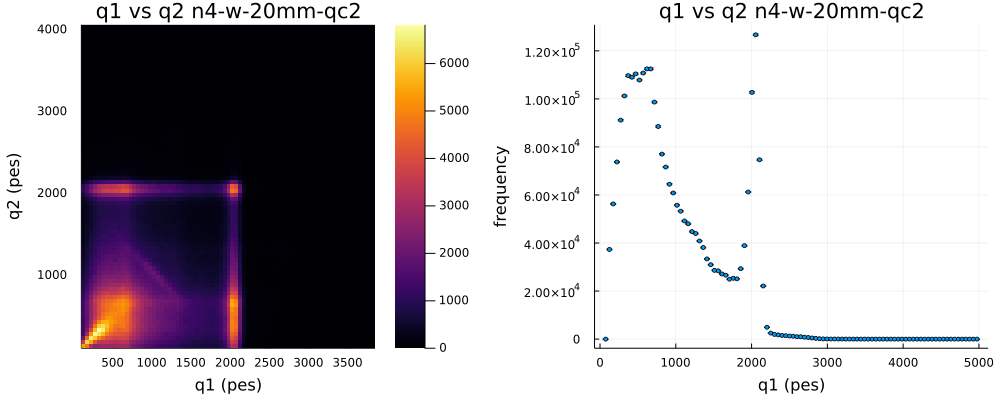

In [16]:
ANema.q1vsq2(ndf, tit="q1 vs q2 $conf", filename=joinpath(pathp, "q1q2"), save=true)

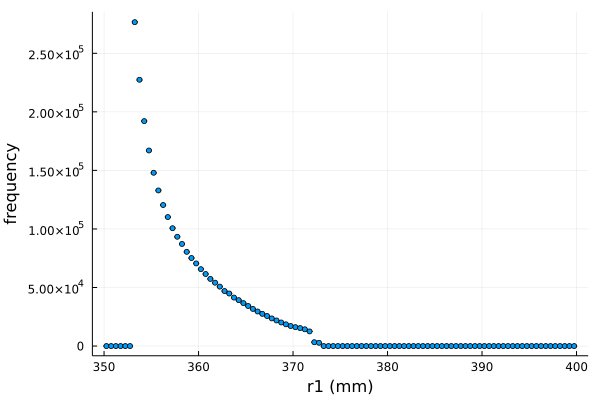

In [17]:
h,p = hist1d(ndf.r1, "r1 (mm)", 100, 350., 400.)
plot(p)

## Cut in (q1,q2) 

In [80]:
wmin = 1900.0
wmax = 2200.0
ndfq =ANema.selectinterval(ndf, "q1", "q2", wmin, wmax);
println("after q1q2 cut: ndfq has a length of ", nrow(ndfq), " fraction = ", nrow(ndfq)/norm)

after q1q2 cut: ndfq has a length of 56130 fraction = 0.011226


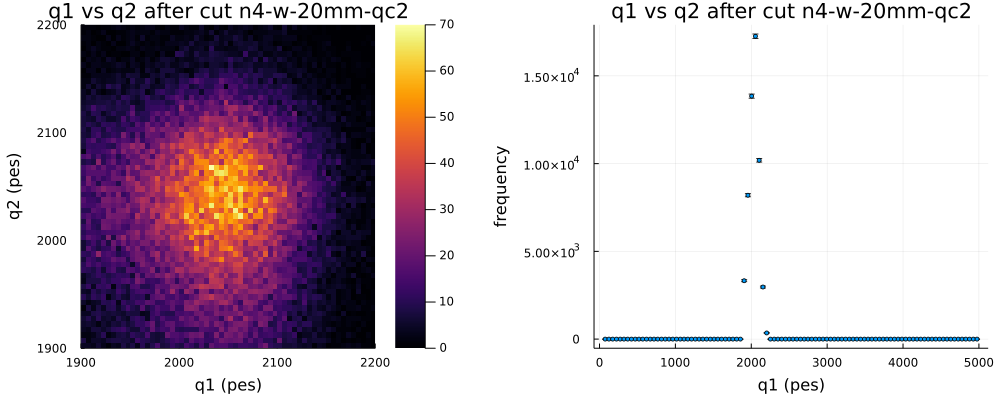

In [81]:
ANema.q1vsq2(ndfq, tit="q1 vs q2 after cut $conf", 
filename=joinpath(pathp, "q1q2-qcut"), save=true)

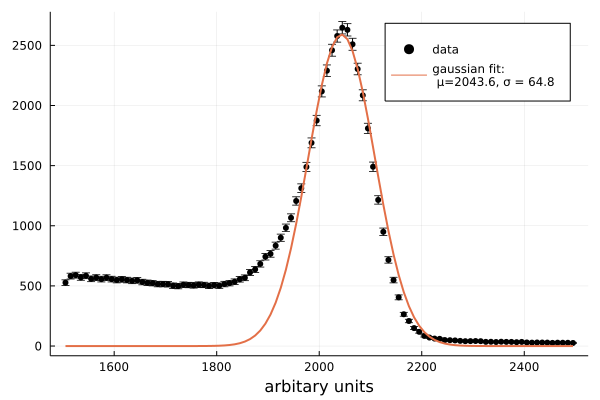

In [82]:
fg, p = ATools.plot_fit_gauss(ndf.q1, "energy (pes)", "arbitary units", 100, 1500.0, 2500.0,
                       xgmin = 1950.0, xgmax = 2100., gbins=50)
plot(p)

In [83]:
@printf " resolution (σE/E) = %5.2f" fg.std[1] / fg.mu[1]

 resolution (σE/E) =  0.03

In [84]:
@printf " resolution (σE/E) window = %5.2f" (wmax -wmin) / fg.mu[1]

 resolution (σE/E) window =  0.15

## r vs q

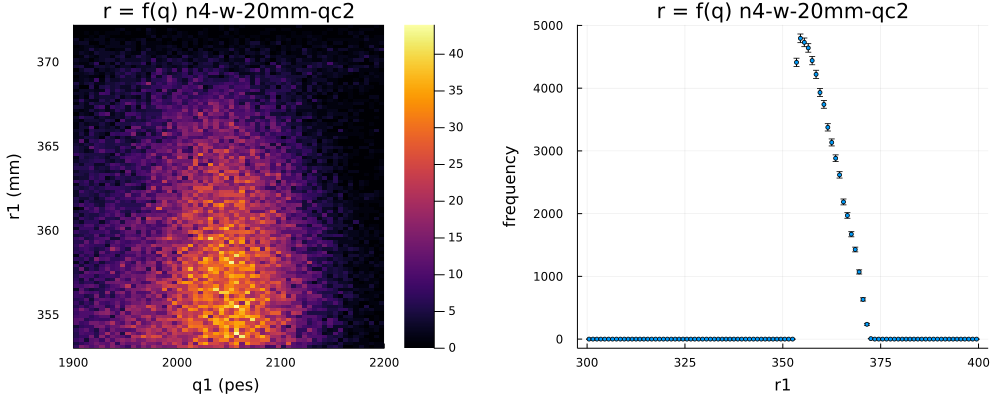

In [85]:
ANema.r1q1(ndfq,tit="r = f(q) $conf", filename=joinpath(pathp, "rq"), save=true)

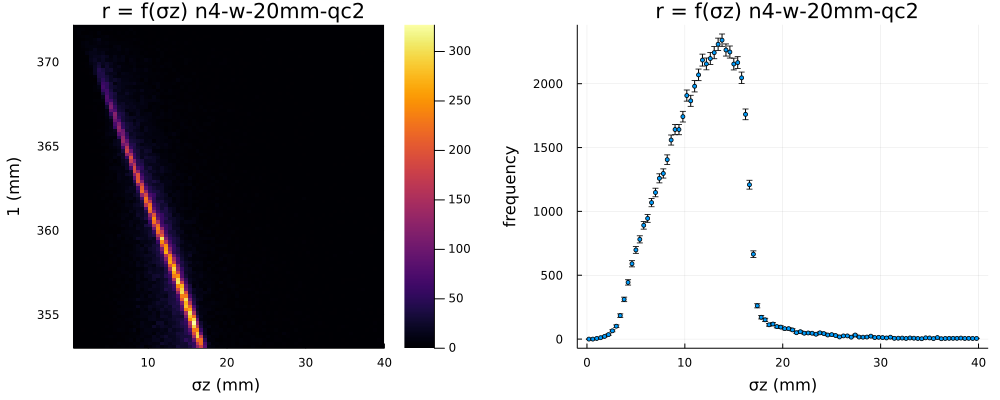

In [86]:
ANema.zstd(ndfq, tit=" r = f(σz) $conf", filename=joinpath(pathp, "zstd"), save=true)

In [87]:
ndfz =ANema.selectinterval(ndfq, "zstd1", "zstd2", 1.0, 17.0);
println("after zstd cut: ndfz has a length of ", nrow(ndfz))

after zstd cut: ndfz has a length of 51473


In [88]:
eff = nrow(ndfz) / norm
@printf "efficiency = %5.2f" 100* eff

efficiency =  1.03

Fit parameters: a = 372.75 b = -1.13 c = 0.001 Fit errors: a =   0.2 b = 0.056 c = 0.003

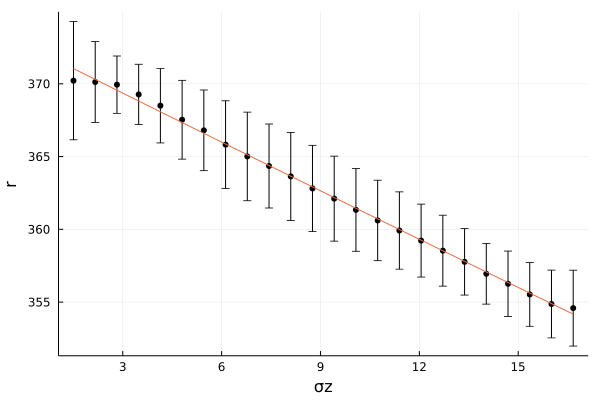

In [89]:
fz2, pz2 = fit_profile(ndfz.zstd1, ndfz.r1, "σz", "r", "pol2")
fpars = fz2.fitpar
fstds = fz2.fitstd
@printf "Fit parameters: a = %5.2f b = %5.2f c = %5.2g " fpars[1] fpars[2] fpars[3]
@printf "Fit errors: a = %5.1g b = %5.2g c = %5.2g" fstds[1] fstds[2] fstds[3]
ANema.pout(pz2, joinpath(pathp, "zstd-fitpol2"))
plot(pz2)

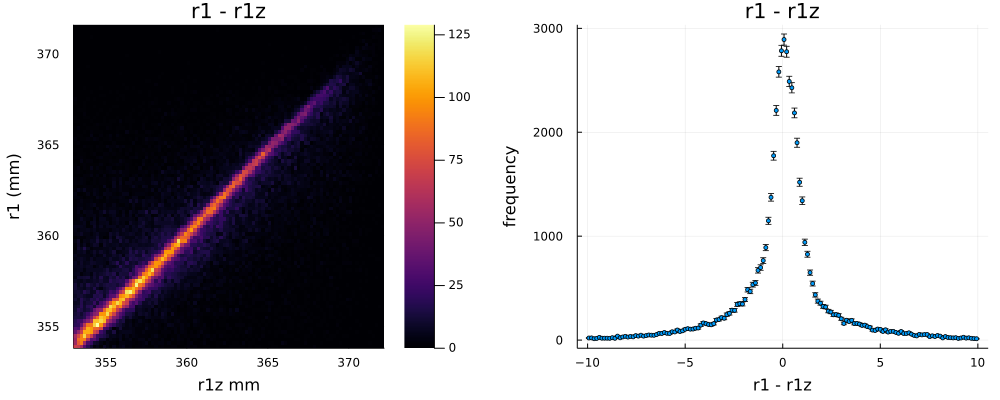

In [90]:
r1z = fz2.g.(ndfz.zstd1) + 0.0 * ones(length(ndfz.q1)) ; 
ANema.plotreso(r1z, ndfz.r1, "r1z mm", "r1 (mm)", -10., 10., tit="r1 - r1z", 
         filename=joinpath(pathp, "r1-r1z-zcut"), save=true)


r-rz σ1 =   2.797 σ2 =   0.606

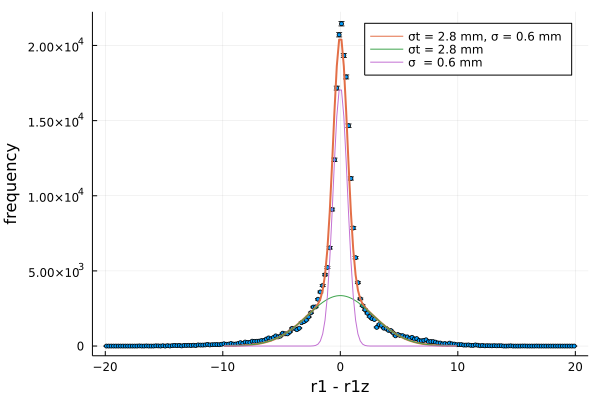

In [91]:
fg, p = fitg2(r1z - ndfz.r1, "r1 - r1z", 200, -20.0, 20.0, 
                      xg1min=-10.0, xg1max=-5.0, 
                      xg2min=-5.0,  xg2max =5.0, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "r-rz σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
ANema.pout(p, joinpath(pathp, "zstd-fitg2"))
plot(p)

Fit parameters: a = 372.75 b = -1.13 c = 0.001 Fit errors: a =   0.2 b = 0.056 c = 0.003

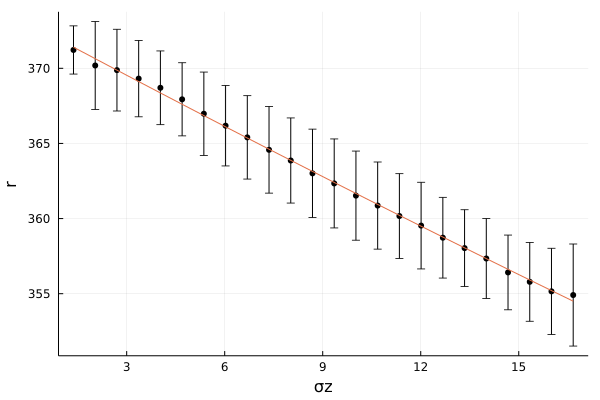

In [92]:
fzr2, pzr2 = fit_profile(ndfz.zstd2, ndfz.r2, "σz", "r", "pol2")
fpars = fz2.fitpar
fstds = fz2.fitstd
@printf "Fit parameters: a = %5.2f b = %5.2f c = %5.2g " fpars[1] fpars[2] fpars[3]
@printf "Fit errors: a = %5.1g b = %5.2g c = %5.2g" fstds[1] fstds[2] fstds[3]
ANema.pout(pzr2,joinpath(pathp, "zstd-fitpol2"))
plot(pzr2)

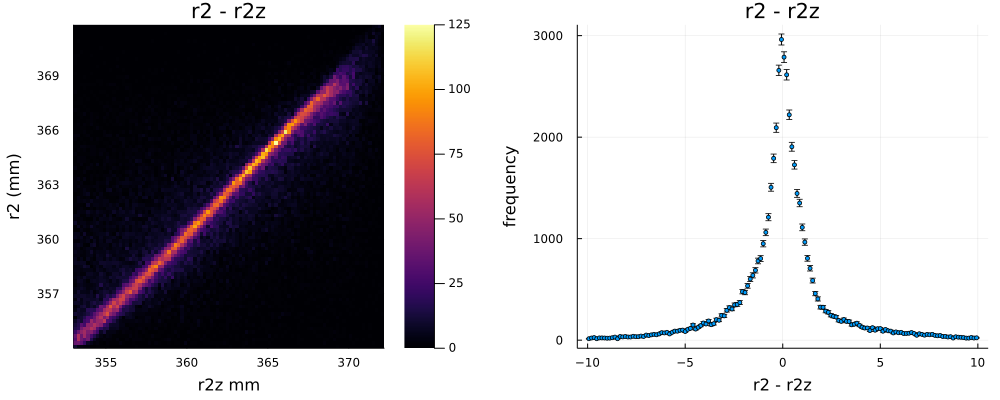

In [93]:
r2z = fzr2.g.(ndfz.zstd2) + 0.0 * ones(length(ndfz.q2)) 
ANema.plotreso(r2z, ndfz.r2, "r2z mm", "r2 (mm)", -10., 10.0, tit="r2 - r2z", 
         filename=filename=joinpath(pathp, "r1-r1z"), save=true)


r-rz σ1 =   2.149 σ2 =   0.507

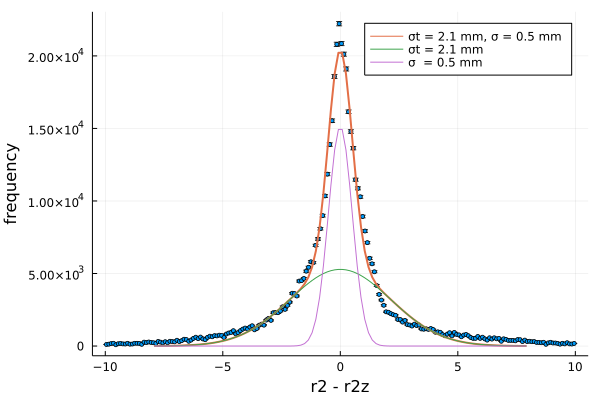

In [94]:
fg, p = fitg2(r2z - ndfz.r2, "r2 - r2z", 200, -10.0, 10.0, 
                      xg1min=-8.0, xg1max=-2.5, 
                      xg2min=-2.5,  xg2max =2.5, 
                      xgmin =-8.0, xgmax  =8.0)
@printf "r-rz σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
ANema.pout(p, joinpath(pathp, "zstd-fitg2-r2"))
plot(p)

## Resolution in (x,y,z,r) intrinsic

 σx =     0.2 mm σy =     0.2 mm σz =     0.4 mm

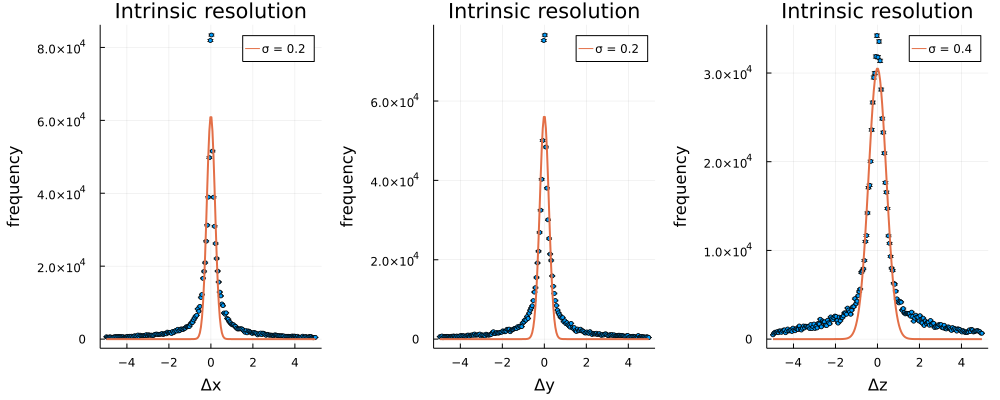

In [95]:
fg,px = fitg1(ndfz.xt1 - ndfz.x1, "Δx", 200, -5.0, 5.0, xgmin=-1.5, xgmax=1.5)
@printf " σx = %7.1f mm" fg.std[1]
fg,py = fitg1(ndfz.yt1 - ndfz.y1, "Δy", 200, -5.0, 5.0, xgmin=-1.5, xgmax=1.5)
@printf " σy = %7.1f mm" fg.std[1]
fg,pz = fitg1(ndfz.zt1 - ndfz.z1, "Δz", 200, -5.0, 5.0, xgmin=-1.5, xgmax=1.5)
@printf " σz = %7.1f mm" fg.std[1]
ANema.plot_and_save(px,py, pz, "Intrinsic resolution", joinpath(pathp, "Intrinsic-res")) 

## Resolución reco

## Position from best estimator (r1p)

In [96]:
xz1,yz1,zz1 = ANema.radial_correction(ndfz.xr1, ndfz.yr1, ndfz.zr1, r1z);
xz2,yz2,zz2 = ANema.radial_correction(ndfz.xr2, ndfz.yr2, ndfz.zr2, r2z);

 σx1 =  0.63 mm σy1 =  0.60 mm σz =  0.42 mm

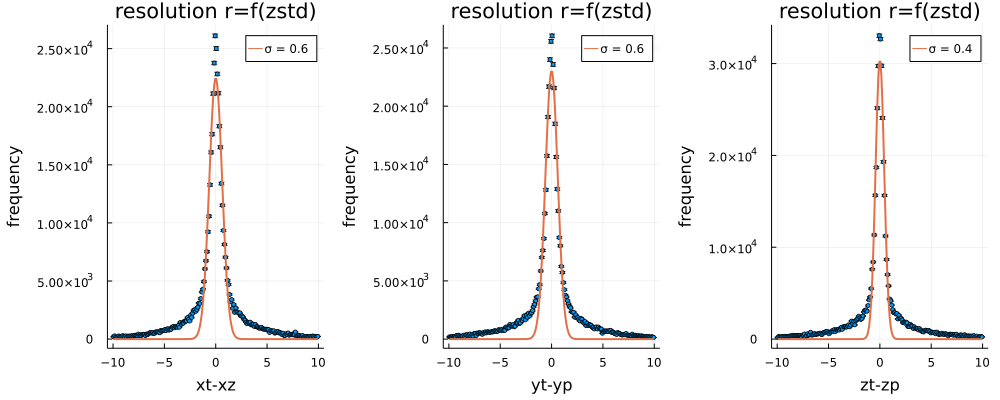

In [97]:
fg,pzx1 = fitg1(ndfz.xt1 - xz1, "xt-xz", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σx1 = %5.2f mm" fg.std[1] 
fg,pzy1 = fitg1(ndfz.yt1 - yz1, "yt-yp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σy1 = %5.2f mm" fg.std[1] 
fg,pzz1 = fitg1(ndfz.zt1 - zz1, "zt-zp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σz = %5.2f mm" fg.std[1]
ANema.plot_and_save(pzx1,pzy1, pzz1, "resolution r=f(zstd)", joinpath(pathp, "zstd-res-r1")) 

 σx1 =  0.62 mm σy1 =  0.60 mm σz =  0.39 mm

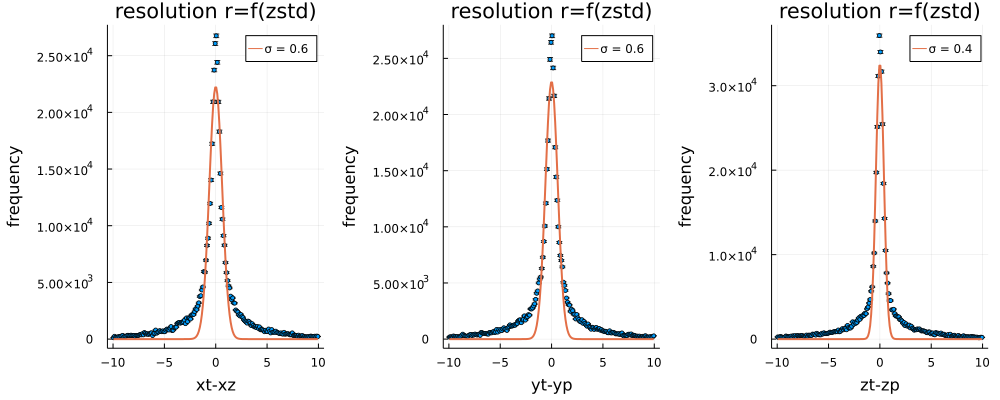

In [98]:
fg,pzx2 = fitg1(ndfz.xt2 - xz2, "xt-xz", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σx1 = %5.2f mm" fg.std[1] 
fg,pzy2 = fitg1(ndfz.yt2 - yz2, "yt-yp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σy1 = %5.2f mm" fg.std[1] 
fg,pzz2 = fitg1(ndfz.zt2 - zz2, "zt-zp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σz = %5.2f mm" fg.std[1]
ANema.plot_and_save(pzx2,pzy2, pzz2, "resolution r=f(zstd)", joinpath(pathp, "zstd-res-r2")) 

In [99]:
@printf "typical resolution (FWHM) = %5.2f" 2.3 * fg.std[1]

typical resolution (FWHM) =  0.89

In [100]:
ndfz[!,"r1x"] = r1z;
ndfz[!,"r2x"] = r2z;

## TOF

In [41]:
dfz = ANema.setunits(ndfz);

First photon, position true: FWHM1 = 227.031 FWHM2 =  33.122

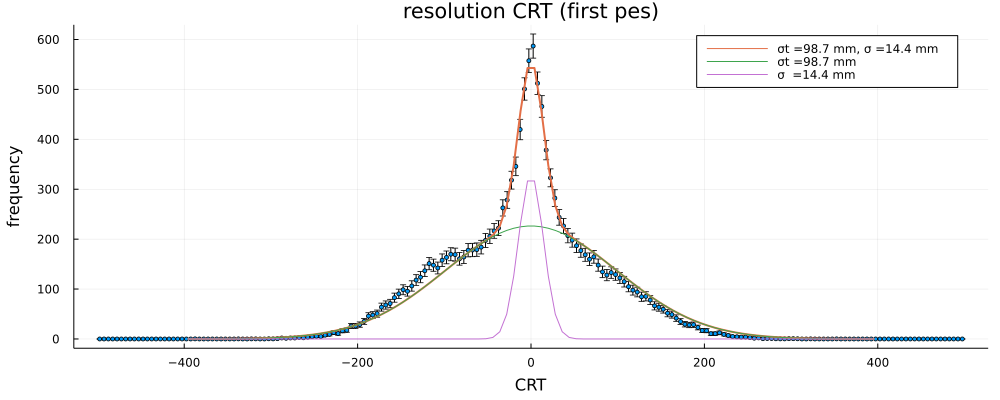

In [42]:
dt = ANema.crt(dfz, ANema.dtfirst, ANema.postrue)
fg, p = fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "First photon, position true: FWHM1 = %7.3f FWHM2 = %7.3f" 2.3*fg.std[1] 2.3*fg.std[2]
ANema.plot_and_save(p, "resolution CRT (first pes)", joinpath(pathp, "CRT-first")) 

fastest photoelectron, position reco: FWHM = 229.027

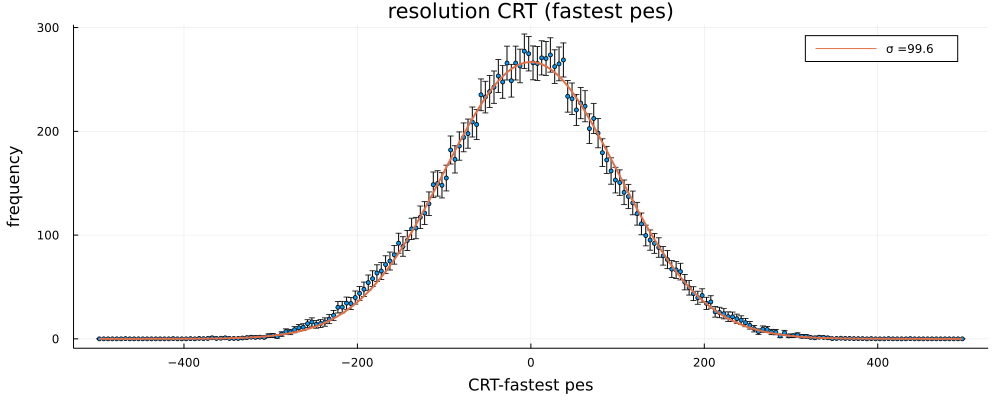

In [43]:
dt = ANema.crt(dfz,  ANema.dtminimum, ANema.postrue)
fg,p = ANema.fitg1(dt.+10.0, "CRT-fastest pes", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
ANema.plot_and_save(p, "resolution CRT (fastest pes)", joinpath(pathp, "CRT-fastest")) 

fastest photoelectron, position reco: FWHM = 235.705

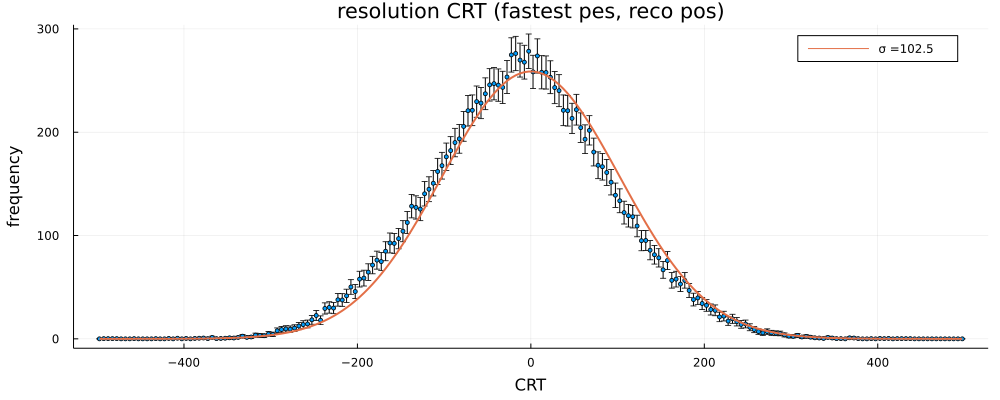

In [44]:
dt = ANema.crt(dfz,  ANema.dtminimum, ANema.posrecall)
fg,p = fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
ANema.plot_and_save(p, "resolution CRT (fastest pes, reco pos)", joinpath(pathp, "CRT-fastest-reco")) 

average photoelectrons, position reco: FWHM = 229.755

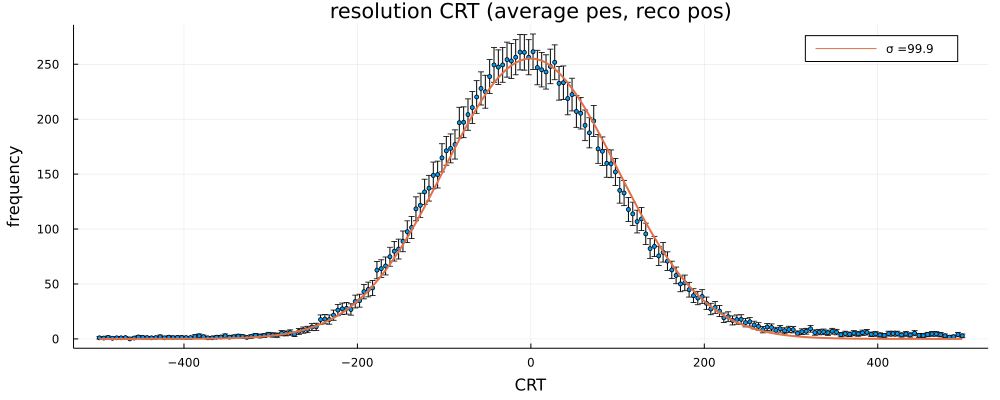

In [45]:
dt = ANema.crt(dfz, ANema.dtaverage, ANema.posrecall)
fg,p = fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectrons, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
ANema.plot_and_save(p, "resolution CRT (average pes, reco pos)", joinpath(pathp, "CRT-average-reco")) 

## Save

In [101]:
ANema.writemdf(patho,"mdf-zstd-$conf.csv", ndfz)

"../data/n4-w-20mm-qc2-mdf/mdf-zstd-n4-w-20mm-qc2.csv"

## NEMA4

In [102]:
lors_average_recall = ANema.dftolor(dfz, ANema.dtaverage, ANema.posrecall, f32= false);

In [103]:
println("size of data set =", nrow(ndfz), " fraction =", nrow(ndfz)/norm)

size of data set =51473 fraction =0.0102946


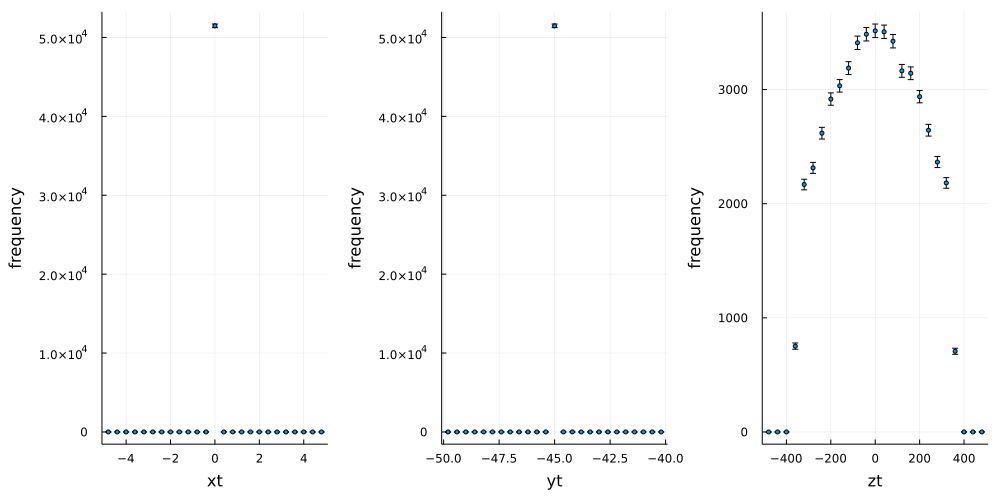

In [104]:
hx,px = hist1d(ndfz.xs, "xt", 25, -5.0, 5.0, norm=false)
hz,pz = hist1d(ndfz.zs, "zt", 25, -500.0, 500.0, norm=false)
hy,py = hist1d(ndfz.ys, "yt", 25, -50.0, -40.0, norm=false)
plot(px,py,pz, layout= (1, 3), legend=false, fmt = :png, size = (1000, 500),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)

In [105]:
sxdf = ANema.sinogramdf(lors_average_recall)
first(sxdf,5)

,x1,y1,z1,x2,y2,z2,zl,rl,tl
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-201.189,295.528,440.405,166.553,-325.257,-330.439,770.844,22.4762,-0.597709
2,-353.834,-35.9634,-463.185,359.992,-73.7204,-64.8933,-398.292,54.6027,-1.67209
3,293.356,201.288,155.504,-258.48,-261.819,-467.848,623.353,34.3934,0.969423
4,348.823,85.4934,-18.0858,-323.348,-165.513,238.707,-256.793,41.9375,1.33044
5,357.941,36.1665,71.0378,-303.851,-206.444,349.018,-277.98,89.2452,1.4701


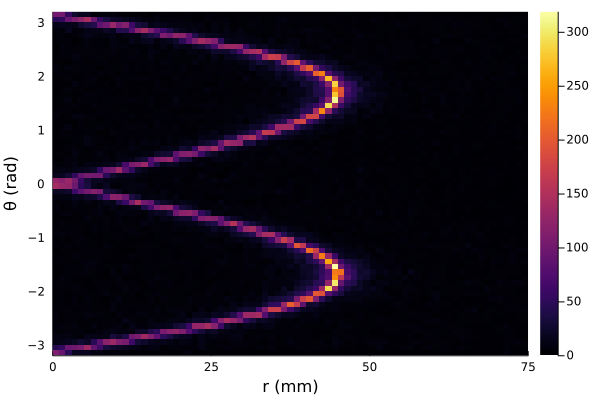

In [294]:
h1,p1 = hist2d(sxdf.rl, sxdf.tl, 100, "r (mm)", "θ (rad)",0.0, 75.0, -Float64(π), Float64(π))
plot(p1, fmt = :png)

In [116]:
zdfs = zxdf(sxdf,  nbinz=4, zmin=-350.0, zmax=350.0);
    

In [61]:
function thetasgrm(df::DataFrame; ntproj::Integer, nbinr=20, rmin=0.0, rmax=75.0)
    
    ht  = hist1d(df.tl, ntproj, -Float64(π), Float64(π))
    hte = ht.edges[1]
    RT = [select_by_column_value_interval(df, 
                                         "tl", 
                                         hte[i], hte[i+1]) for i in 1:length(hte)-1]
    rH = [hist1d(dfx.rl, nbinr, rmin, rmax) for dfx in RT]
end

thetasgrm (generic function with 1 method)

In [107]:
rhst = thetasgrm(sxdf, ntproj=4, nbinr=20, rmin=0.0, rmax=60.0);

In [108]:
PLT=[]
for (i, hst) in enumerate(rhst)
    lbl = string("θ-bin =", string(i))
    _, p = hist1d(hst, lbl)
    push!(PLT,p)
end

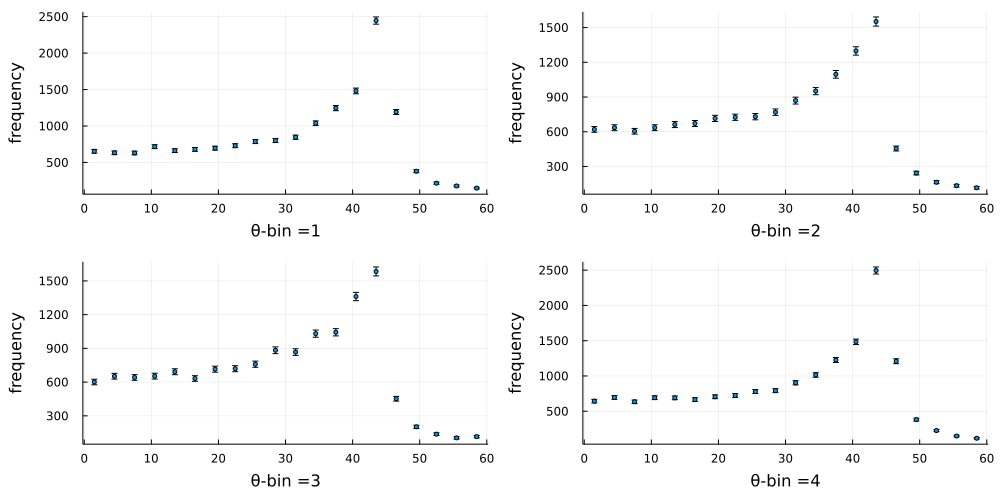

In [109]:
plot(PLT..., layout= (2, 2), legend=false, fmt = :png, size = (1000, 500),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)

In [129]:
SOT = []
for (i, hrl) in enumerate(rhst)
    println("θ bin =", i)
    S,T,P = ANema.stp(hrl, i0 = 6, i1 = 20)
    push!(SOT, S/T)
    @printf " T = %5.1f S = %5.1f P = %5.1f S/T = %5.1f" T S P S/T
    
end
@printf "\nS/T (average) = %5.1f" mean(SOT)
    

θ bin =1
 T = 6681.0 S = 9477.0 P = 16158.0 S/T =   1.4θ bin =2
 T = 4644.0 S = 9000.0 P = 13644.0 S/T =   1.9θ bin =3
 T = 5129.0 S = 8714.0 P = 13843.0 S/T =   1.7θ bin =4
 T = 7016.0 S = 9205.0 P = 16221.0 S/T =   1.3
S/T (average) =   1.6

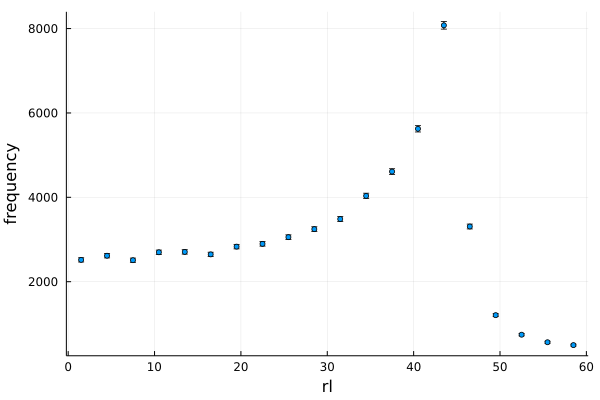

In [111]:
hr,pr = hist1d(sxdf.rl, "rl", 20, 0.0, 60.)
plot(pr)

In [130]:
HRZ = []
PRZ = []
for (i, zdf) in enumerate(zdfs)
    hr,pr = hist1d(zdf.rl, "rl", 20, 0.0, 60.)
    push!(HRZ, hr)
    push!(PRZ, pr)
end

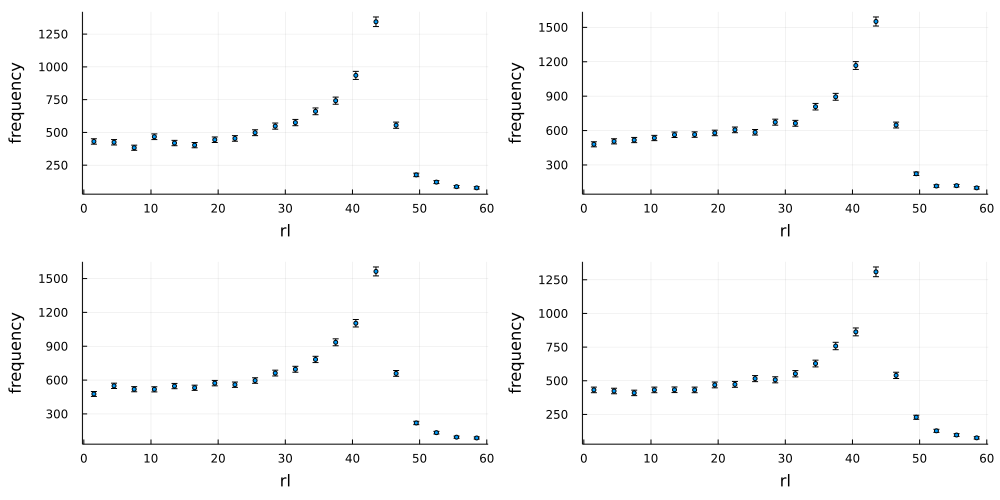

In [118]:
plot(PRZ..., layout= (2, 2), legend=false, fmt = :png, size = (1000, 500),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)

In [206]:
SOT = []
for (i, hrl) in enumerate(HRZ)
    println("z bin =", i)
    S,T,P = ANema.stp(hrl, i0 = 6, i1 = 20)
    push!(SOT, S/T)
    @printf " T = %5.1f S = %5.1f P = %5.1f S/T = %5.1f" T S P S/T
end
sot = mean(SOT)
@printf "\nS/T (average) = %5.1f" sot

z bin =1
 T = 4041.0 S = 5703.0 P = 9744.0 S/T =   1.4z bin =2
 T = 4380.0 S = 7518.0 P = 11898.0 S/T =   1.7z bin =3
 T = 4601.0 S = 7206.0 P = 11807.0 S/T =   1.6z bin =4
 T = 3777.0 S = 5931.0 P = 9708.0 S/T =   1.6
S/T (average) =   1.6

In [132]:
S,T,P = ANema.stp(hr, i0 = 6, i1 = 20)
    @printf " T = %5.1f S = %5.1f P = %5.1f S/T = %5.1f" T S P S/T
    println()
    nec = T/(1 + S/T)   
    @printf " nec = %5.1f, SNR = %5.1f NEC/P = %5.2f " nec sqrt(nec) nec/P

 T = 3777.0 S = 5931.0 P = 9708.0 S/T =   1.6
 nec = 1469.5, SNR =  38.3 NEC/P =  0.15 

In [108]:
L = 700.0 # length of phantom
d = 3.2 # diameter of phantom
V = π*(d/2.0)^2 * L
@printf " Phantom: L(mm) = %5.1f d (mm) = %5.1f V (mm3 = mL) =%5.1f" L d V

 Phantom: L(mm) = 700.0 d (mm) =   3.2 V (mm3 = mL) =5629.7

In [295]:
file = "/Users/jj/JuliaProjects/NReco/data/zoo/n4_20mm_f30.csv"
evtdf = DataFrame(CSV.File(file))

,empty,good-prompt,prompt,single,single-prompt,total
,Int64,Int64,Int64,Int64,Int64,Int64
1,46344,509,17571,83451,10291,147366


In [296]:
rgp = evtdf[!, "good-prompt"][1] / evtdf[!, "total"][1]
rsp = evtdf[!, "single-prompt"][1] / evtdf[!, "total"][1]

@printf "\nfraction good prompt = %5.3g " rgp
@printf "\nfraction single prompt = %5.3g " rsp


fraction good prompt = 0.00345 
fraction single prompt = 0.0698 

In [142]:
kcps(x) = x/1e+3

kcps (generic function with 1 method)

In [297]:
eff

0.0102946

In [242]:
L = 700.0 * mm # length of nema4 phantom
d = 203.0 * mm # diameter of nema4 phantom
V = π*(d/2.0)^2 * L 
VmL = uconvert(cm^3, V) / cm^3
@printf " Phantom: L(mm) = %5.1f d (mm) = %5.1f V ( mL) =%5.1f" L/mm d/mm VmL


 Phantom: L(mm) = 700.0 d (mm) = 203.0 V ( mL) =22655.8

In [245]:
Unitful.kBq

kBq

In [246]:
kBq=1e+3
A = 10 * Unitful.kBq/cm^3
N = A * V
@printf "\n Activity (kBq/mL) = %5.2f  N (kcps) =%5.2g" A/(Unitful.kBq/cm^3) N/Unitful.kBq


 Activity (kBq/mL) = 10.00  N (kcps) =2.3e+05

In [304]:
AA = LinRange(0.0, 15.0, 200)
Act = AA * Unitful.kBq/cm^3;

In [305]:
NkBq = uconvert.(Unitful.kBq, Act * V) /Unitful.kBq;

In [187]:
pok1(λ::Float64) = exp(-λ) * (1.0 + λ)


pok1 (generic function with 1 method)

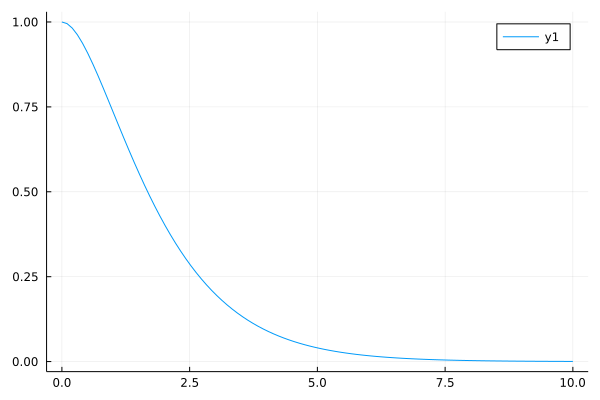

In [188]:
X = LinRange(0.0, 10., 100)
plot(X, pok1.(X))

In [189]:
function pdt(rkcps::Float64, wmus::Float64)
    λ = rkcps * wmus * 1e-3  # λ = rate/(1/w) = rate * w where rate in kcps, w in mus
    return pok1(λ)
end

pdt (generic function with 1 method)

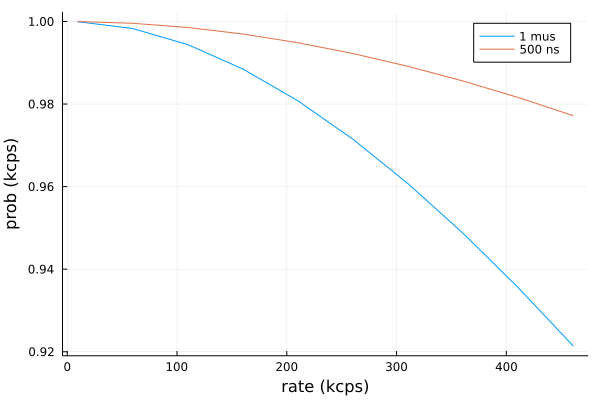

In [198]:
p1 = plot(T, pdt.(T, (1.0,)), label="1 mus")
p2 = plot!(p1, T, pdt.(T, (0.5,)), label="500 ns")
xlabel!("rate (kcps)")
ylabel!("prob (kcps)")

In [284]:
function cnec(n_kcps::Float64, 
              eff_gp::Float64, 
              eff_sp::Float64, 
              SOT::Float64       =1.6, 
              eff_cwns::Float64  = 1e-9,
              deadt_mus::Float64 = 0.6)

    # n_kcps is the number of counts in kcps 
    # eff_gp is the efficiency for good prompts
    # eff_sp is the efficiency for single prompts
    # SOT = S/T, the ratio of plots to trues 
    # eff_cwns is the coincidence window in ns. Since rates come in kcps multiply by 10^3
    
    eff_w =  eff_cwns *1e+3
    nT = n_kcps * eff_gp               # number of good coincidences in scanner
    nS = nT * SOT                      # number of scatters in scanner
    n1 = n_kcps * eff_sp                # number of singles in scanner
    nR = 2 * n1^2 * eff_w              # number of randoms
    ntot = nT + nS + nR
    
    prob = pdt(ntot, deadt_mus)
    nT   *= prob
    nS   *= prob
    #nR   *= prob
    ntot *= prob

    nec = nT / (1.0 + nS/nT + nR/nT)   # nec

    
    return nT, nS, nR, ntot, nec, prob
end

cnec (generic function with 6 methods)

In [220]:
function unzipn(rs)
    nT, nS, nR, ntot, nec, prob =  collect(zip(rs...))
    return collect(nT), collect(nS), collect(nR), collect(ntot),collect(nec), collect(prob)
end

unzipn (generic function with 1 method)

- Use eff ~1 % as the efficiency for the good prompts (result from selection)
- Use rsp for the efficiency for singles. 

In [308]:
res =cnec.(NkBq, (eff,), (rsp,), (sot,), (1e-9,), (0.5,))
nT, nS, nR, ntot, nec, prob = unzipn(res);

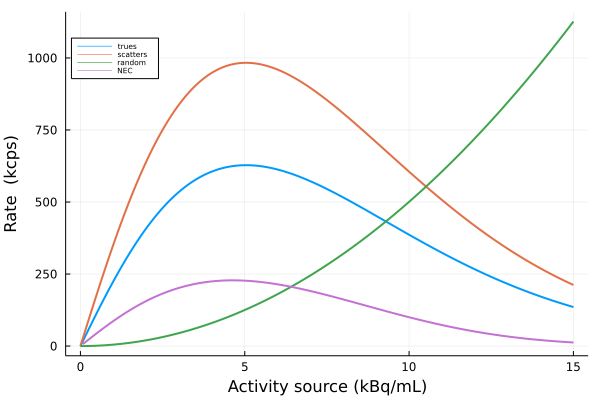

In [309]:
#p = scatter(AA,ntot, yerr = sqrt.(ntot), makersize=1, label="total", 
#legend=(0.1,0.9), legendfontsize=5, fmt = :png,)
p = plot(AA,nT,  lw=2, label="trues", 
legend=(0.1,0.9), legendfontsize=5, fmt = :png,)
p = plot!(p,AA,nS, lw=2, label="scatters", 
legend=(0.1,0.9), legendfontsize=5, fmt = :png,)
p = plot!(p,AA,nR, lw=2, label="random", 
legend=(0.1,0.9), legendfontsize=5, fmt = :png,)
p = plot!(p,AA,nec, lw=2, label="NEC", 
legend=(0.1,0.9), legendfontsize=5, fmt = :png,)
xlabel!("Activity source (kBq/mL)")
ylabel!("Rate  (kcps)")

In [217]:
Ar

10-element LinRange{Float64}:
 1000.0,6444.44,11888.9,17333.3,22777.8,…,33666.7,39111.1,44555.6,50000.0

In [128]:


nA = N * eff_a # number of all coincidences in scanner
nC = N * eff_p # number of good coincidences in scanner
nS = nC * (S/T) # number of scatters in scanner
NEC = 0.2 * nA
n1 = N * eff_s
nR = 2 * n1^2 * eff_w
@printf "\n n1 =%5.2g kcps" kcps(n1)
@printf "\n nR =%5.2g kcps" kcps(nR)
@printf "\n nS =%5.2g kcps" kcps(nS)
@printf "\n nC =%5.2f kcps" kcps(nC) 
@printf "\n nT =%5.2f kcps" kcps(nC + nS + nR) 
@printf "\n NEC =%5.2f kcps" kcps(NEC)

 Phantom: L(mm) = 700.0 d (mm) =   3.2 V ( mL) =  5.6
 Activity (kBq/mL) = 1000.00  N (kcps) =5.6e+03
 n1 =7.2e+02 kcps
 nR =  1.1 kcps
 nA =7.8e+02 kcps
 nC =53.55 kcps
 NEC =155.71 kcps

In [97]:
function sensi(d::Float64, L::Float64, A::Float64, D::Float64, Φ::Float64)
    ϵ = (1.0 - exp(-d/L)) * Φ
    Ω = sin(atan(A,D))
    η = ϵ^2 * Ω
    return ϵ, Ω, η
end 
    

sensi (generic function with 3 methods)

In [101]:
eps, omega, sx = sensi(30.0, 37.0, 1000.0, 700.0, 1.0)

(0.5555024833179435, 0.8192319205190405, 0.2528010510800053)

In [96]:
exp(-20.0/37.0)

0.5824333384381947